In [2]:
#Importando las librerías y leyendo el archivo indicado:
import pandas as pd
import numpy as np
df=pd.read_csv("Population2.csv", encoding='latin1', skiprows=1)
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",253,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6649,716,Zimbabwe,2022,Total fertility rate (children per women),3.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6650,716,Zimbabwe,2022,"Infant mortality for both sexes (per 1,000 liv...",37.4,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6651,716,Zimbabwe,2022,Life expectancy at birth for both sexes (years),59.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6652,716,Zimbabwe,2022,Life expectancy at birth for males (years),56.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [5]:
print(df['Year'].unique()) #solo estos años aparecen:[2010 2015 2017 2022]

[2010 2015 2017 2022]


In [4]:
#Convirtiendo a valores numericos ya que provienen de csv:
df['Year']=pd.to_numeric(df['Year'], errors='coerce')
df['Value']=pd.to_numeric(df['Value'], errors='coerce')

#Filtrando por año 2022:
cond1= (df["Year"]==2022) #lo hare para el 2022 porque no hay 2020
df_filt=df[cond1]

print(df_filt)



      Region/Country/Area                     Unnamed: 1  Year  \
21                      1  Total, all countries or areas  2022   
22                      1  Total, all countries or areas  2022   
23                      1  Total, all countries or areas  2022   
24                      1  Total, all countries or areas  2022   
25                      1  Total, all countries or areas  2022   
...                   ...                            ...   ...   
6649                  716                       Zimbabwe  2022   
6650                  716                       Zimbabwe  2022   
6651                  716                       Zimbabwe  2022   
6652                  716                       Zimbabwe  2022   
6653                  716                       Zimbabwe  2022   

                                                 Series  Value  \
21         Population annual rate of increase (percent)    0.8   
22            Total fertility rate (children per women)    2.3   
23    Inf

In [33]:
#Extrayendo columnas de series y Value:
df_extr=df_filt[['Series', 'Value']]
df_extr

#checando valores unicos de series:
print(df_extr['Series'].unique())


['Population annual rate of increase (percent)'
 'Total fertility rate (children per women)'
 'Infant mortality for both sexes (per 1,000 live births)'
 'Life expectancy at birth for both sexes (years)'
 'Life expectancy at birth for males (years)'
 'Life expectancy at birth for females (years)']


In [9]:
#Pivoteando df filt

df_pivot = df_filt.pivot(columns='Series', values='Value')
df_pivot

Series,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),Population annual rate of increase (percent),Total fertility rate (children per women)
21,NaN,NaN,NaN,NaN,0.8,NaN
22,NaN,NaN,NaN,NaN,NaN,2.3
23,27.5,NaN,NaN,NaN,NaN,NaN
24,NaN,71.7,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,69.1,NaN,NaN
...,...,...,...,...,...,...
6649,NaN,NaN,NaN,NaN,NaN,3.4
6650,37.4,NaN,NaN,NaN,NaN,NaN
6651,NaN,59.4,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,56.4,NaN,NaN


In [29]:
#Aplicando una función quitar los NaN y resetear valores del Index:

def df_filtered(column):
    
    # Filtrar la columna actual para eliminar valores NaN
    col_filtered = column.dropna()
    
    # Agregar la columna filtrada al DataFrame final
    df_fin=pd.DataFrame(col_filtered)
    
    # Reseteando los valores del índice
    df_fin.reset_index(drop=True, inplace=True)
    
    return df_fin

#usando for para cada columna usando la funcion df_filtered:

df_filtered_result = pd.DataFrame()

# Iterar sobre cada columna
for col in df_pivot.columns:
    
# Aplicar la función df_filtered a cada columna y agregarla al DataFrame final
    df_filtered_result[col] = df_filtered(df_pivot[col])[col]
    

# Resultado final con todas las columnas filtradas sin NaN y con los índices reseteados

print(df_filtered_result)



     Infant mortality for both sexes (per 1,000 live births)  \
0                                                 27.5         
1                                                 44.2         
2                                                 21.4         
3                                                 47.5         
4                                                 35.5         
..                                                 ...         
258                                                9.8         
259                                               23.7         
260                                               46.8         
261                                               38.2         
262                                               37.4         

     Life expectancy at birth for both sexes (years)  \
0                                               71.7   
1                                               62.2   
2                                               71.3   
3      

0.7845360318200717


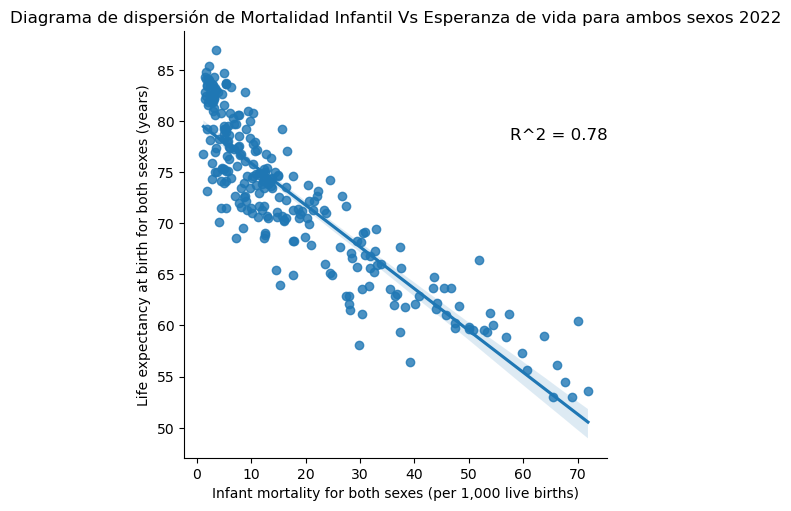

In [60]:

#muestre la relación que guardan la tasa de mortalidad infantil (infant mortality for both sexes) con la esperanza
#de vida para ambos sexos (life expectancy at birth for both sexes) para el año 2020.



#En caso de que queramos agregar el coeficiente de determinación (R^2=:

r_squared = df_filtered_result['Infant mortality for both sexes (per 1,000 live births)'].corr(df_filtered_result['Life expectancy at birth for both sexes (years)'])**2

#Generando el scatter plot:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Infant mortality for both sexes (per 1,000 live births)',
            y='Life expectancy at birth for both sexes (years)', data=df_filtered_result)
plt.title('Diagrama de dispersión de Mortalidad Infantil Vs Esperanza de vida para ambos sexos 2022')
# Agregar el R^2 al gráfico
plt.text(df_filtered_result['Infant mortality for both sexes (per 1,000 live births)'].max() * 0.8, df_filtered_result['Life expectancy at birth for both sexes (years)'].max() * 0.9,
         f'R^2 = {r_squared:.2f}', fontsize=12)
print(r_squared)
plt.show()

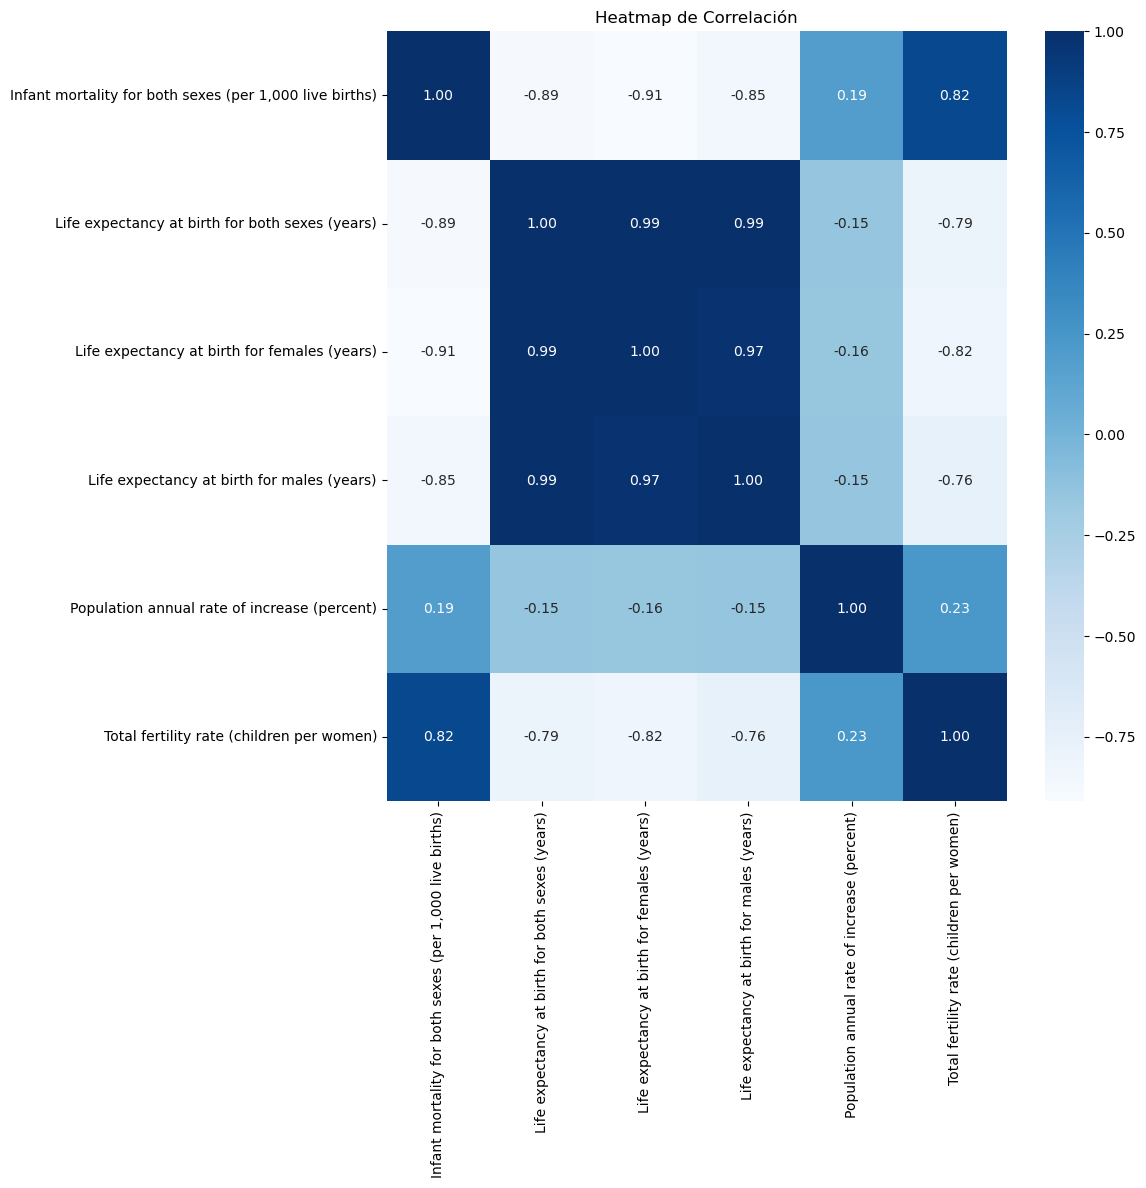

In [76]:
#Correlaciones de todas las variables, heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df_filtered_result.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap de Correlación')


#Guardar grafico como png

plt.savefig('Heatmap2.png', dpi=300)

plt.show()